In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train_processed.csv',index_col=0)
test = pd.read_csv('test_processed.csv',index_col=0)

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Income_Level,Prop_Area_Semiurban,Prop_Area_Urban
0,LP001002,1.0,0,0,1,0,4.844187,360.0,1.0,1.0,8.674026,1,0,1
1,LP001003,1.0,1,1,1,0,4.852030,360.0,1.0,0.0,8.714568,1,0,0
2,LP001005,1.0,1,0,1,1,4.189655,360.0,1.0,1.0,8.006368,1,0,1
3,LP001006,1.0,1,0,0,0,4.787492,360.0,1.0,1.0,8.505323,1,0,1
4,LP001008,1.0,0,0,1,0,4.948760,360.0,1.0,1.0,8.699515,1,0,1


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Income_Level,Prop_Area_Semiurban,Prop_Area_Urban
0,LP001015,1.0,1,0,1,0,4.700480,360.0,1.0,8.651724,1,0,1
1,LP001022,1.0,1,1,1,0,4.836282,360.0,1.0,8.428581,1,0,1
2,LP001031,1.0,1,2,1,0,5.337538,360.0,1.0,8.824678,1,0,1
3,LP001035,1.0,1,2,1,0,4.605170,360.0,0.7,8.494129,1,0,1
4,LP001051,1.0,0,0,0,0,4.356709,360.0,1.0,8.094378,1,0,1


### Splitting Data

In [5]:
X=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']

In [6]:
X.drop('Loan_ID',inplace=True,axis=1)
test.drop('Loan_ID',inplace=True,axis=1)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

##Test data to submit
Test = scaler.transform(test)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_s,y,random_state=45,test_size=1/4,stratify = y,)

In [11]:
X_train.shape

(460, 12)

In [12]:
y_train.shape

(460,)

In [13]:
X_test.shape

(154, 12)

In [14]:
y_test.shape

(154,)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

### Logistic Regression

In [16]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
accuracy_score(y_pred,y_test)

0.7857142857142857

### Decision Tree

In [17]:
dtree = DecisionTreeClassifier(random_state=96,max_depth=4,criterion='entropy')
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
accuracy_score(y_pred,y_test)

0.7922077922077922

### Random Forest by Tuning

In [18]:
RFE = RandomForestClassifier(n_jobs=-1,random_state=96,max_depth=4,max_features='sqrt',min_samples_leaf=15,n_estimators=600,)

In [19]:
RFE.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=15,
                       n_estimators=600, n_jobs=-1, random_state=96)

In [20]:
y_pred = RFE.predict(X_test)

In [21]:
accuracy_score(y_test,y_pred)

0.8116883116883117

In [22]:
cross_val_score(RFE,X_s,y,cv=5)

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [23]:
# RFE = RandomForestClassifier(n_jobs=-1,random_state=96)

# params = [{
#            'max_depth':[4,5,6,7,8],
#            'n_estimators':[500,550,600,650],
#             'min_samples_leaf':[10,15,20,25,30],
#             'max_features':['sqrt','0.2','0.3']
#           }]
# clf = GridSearchCV(RFE, params, cv = 5, scoring='accuracy')
# clf.fit(X_train, y_train)


<BarContainer object of 12 artists>

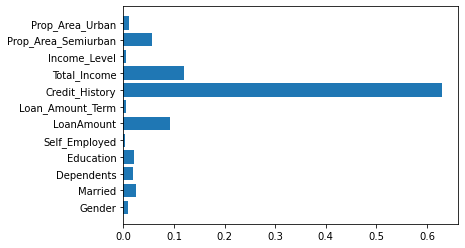

In [50]:
plt.barh(X.columns,RFE.feature_importances_)

### Submission

In [24]:
RFE.fit(X_s,y)

RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=15,
                       n_estimators=600, n_jobs=-1, random_state=96)

In [25]:
predictions = RFE.predict(Test)

In [26]:
giventest = pd.read_csv('test.csv')

In [27]:
giventest['Loan_Status'] = predictions
answer = pd.DataFrame(giventest[['Loan_ID','Loan_Status']])

In [28]:
def decode(x):
    if x>0:
        return 'Y'
    else:
        return 'N'
    

In [29]:
answer['Loan_Status']=answer['Loan_Status'].apply(lambda x: decode(x))

In [30]:
answer['Loan_Status'].value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64

In [31]:
answer.to_csv('Sathish_Sub_RFE.csv',index=False)